#**PRE-PROCESSING**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')

In [23]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
movies['genres']=movies['genres'].str.replace('|', ' ')

In [30]:
print('shape of movies data:',movies.shape)
movies.head()

shape of movies data: (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print('shape of rating data:',ratings.shape)
ratings.head()

shape of rating data: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


###Merging the two datasets

In [7]:
df = pd.merge(ratings,movies,on='movieId')
df = df.drop(['timestamp'],axis=1)
print('shape of df:',df.shape)
df

shape of df: (100836, 5)


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [8]:
df.describe().astype(int)

,userId,movieId,rating
count,100836,100836,100836
mean,326,19435,3
std,182,35530,1
min,1,1,0
25%,177,1199,3
50%,325,2991,3
75%,477,8122,4
max,610,193609,5


In [9]:
num_col=df.select_dtypes(include=['int64', 'float64'])
cat_col=df.select_dtypes(include=['object'])

###Checking for duplicates

In [10]:
def check_duplicate(df):
    duplicate_count = df.duplicated().sum()
    if duplicate_count == 0:
        return 'Data is clean, No Duplicate Data Found.'
    else:
        return f'{duplicate_count} Duplicate Rows Found.'

result = check_duplicate(df)
print(result)

Data is clean, No Duplicate Data Found.


###Checking for missing values

In [11]:
print('null values in the dataset:')
df.isnull().sum()

null values in the dataset:


userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

[Text(0.5, 1.0, 'distribution of rating variables')]

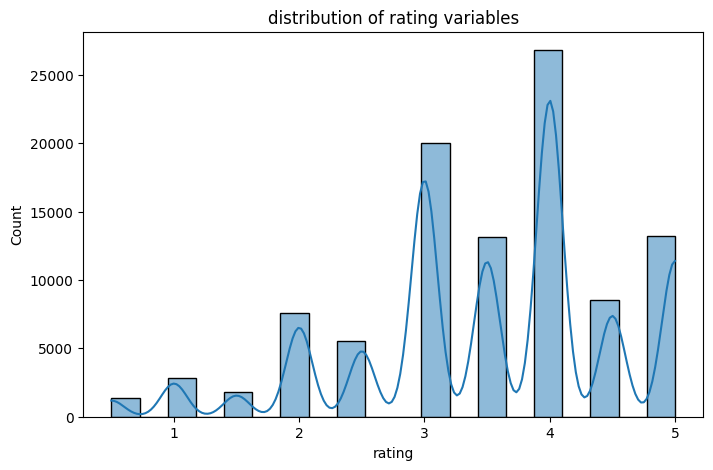

In [13]:
plt.figure(figsize=(8,5))
sbn.histplot(x=df['rating'],bins=20,kde=True).set(title='distribution of rating variables')

<Axes: ylabel='count'>

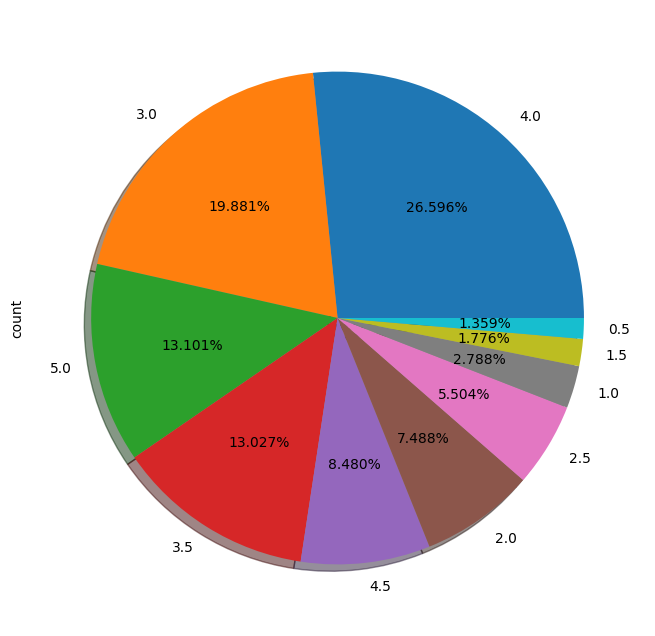

In [14]:
plt.figure(figsize=[8,8],clear=True)
df['rating'].value_counts().plot.pie(autopct='%1.3f%%',shadow=True)

In [15]:
df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

###Correlation matrix

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

           userId   movieId    rating
userId   1.000000  0.006773 -0.049348
movieId  0.006773  1.000000 -0.004061
rating  -0.049348 -0.004061  1.000000


<Axes: >

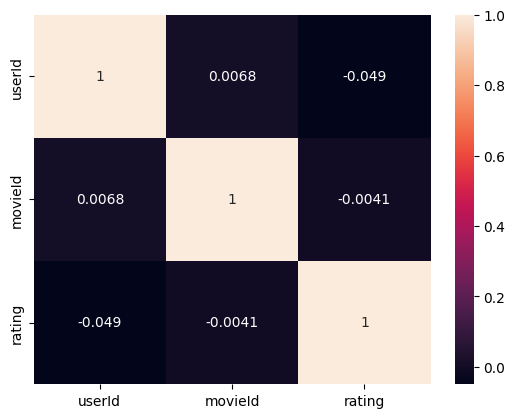

In [19]:
sbn.heatmap(correlation_matrix,annot=True)

In [20]:
rating_count=df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'count'})
rating_count

,title,count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [21]:
final_df = pd.merge(df,rating_count,on='title',how='left')
final_df

,userId,movieId,rating,title,genres,count
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,1
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,1
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,1


#**RECOMMENDATION SYSTEMS**

##**1. GENRE BASED MOVIE RECOMMENDATION SYSTEM**

In [26]:
rec_data=pd.merge(movies, ratings, on='movieId')

In [27]:
rec_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,17,4.5,1305696483


In [28]:
def recommend(genre, n=10):
    genre_movies=rec_data[rec_data['genres'].str.contains(genre, case=False)]
    genre_movies=genre_movies.groupby(['movieId', 'title'])['rating'].mean().reset_index()
    top_genre_movies=genre_movies.sort_values(by='rating', ascending=False).head(n)
    return top_genre_movies[['title', 'rating']]
genre='Romance'
genre_recommendations=recommend(genre, 20)
print(genre_recommendations)

                                          title  rating
1005                     Mr. Skeffington (1944)     5.0
1491                     One I Love, The (2014)     5.0
1492                             Laggies (2014)     5.0
1514                            Delirium (2014)     5.0
1278                     Strictly Sexual (2008)     5.0
1012                  Thousand Clowns, A (1965)     5.0
1037      Summer's Tale, A (Conte d'été) (1996)     5.0
982                     Raise Your Voice (2004)     5.0
774   Open Hearts (Elsker dig for evigt) (2002)     5.0
491         All the Vermeers in New York (1990)     5.0
1560                        Unicorn City (2012)     5.0
497                           Bossa Nova (2000)     5.0
775                            Lady Jane (1986)     5.0
1559                          Spellbound (2011)     5.0
852                            Jane Eyre (1944)     5.0
1556                           The Girls (1961)     5.0
1566                           All Yours (2016) 

##**2. RATINGS BASED MOVIE RECOMMENDATION SYSTEM**

In [32]:
user_movie = pd.merge(ratings, movies, on='movieId')

In [33]:
user_movie.shape
user_movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure Animation Children Comedy Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure Animation Children Comedy Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure Animation Children Comedy Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure Animation Children Comedy Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action Crime Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action Drama Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror Thriller


###User-movie rating matrix

In [34]:
movie_user_filtercoll = user_movie.pivot_table('rating', columns='movieId', index='userId')
movie_user_filtercoll = movie_user_filtercoll.fillna(0)

In [35]:
movie_user_filtercoll

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k, metric='cosine')
knn.fit(movie_user_filtercoll.values.T, movie_user_filtercoll.columns)

KNeighborsRegressor(metric='cosine')

###Selecting a user and finding the movies they have rated positively

In [37]:
user_id = 1
user_likes = movie_user_filtercoll.loc[user_id]
user_positive_ratings = user_likes[user_likes > 0]

In [38]:
user_positive_ratings

movieId
1       4.0
3       4.0
6       4.0
47      5.0
50      5.0
       ... 
3744    4.0
3793    5.0
3809    4.0
4006    4.0
5060    5.0
Name: 1, Length: 232, dtype: float64

In [39]:
recommendations_user_based = []

In [40]:
for movie_id, rating in user_positive_ratings.items():
    movie_index = movie_user_filtercoll.columns.get_loc(movie_id)
    distances, indices = knn.kneighbors([movie_user_filtercoll.iloc[:, movie_index]], n_neighbors=k)
    similar_movie_ids = movie_user_filtercoll.columns[indices[0]]
    similar_movie_ids = [movie for movie in similar_movie_ids if movie not in user_positive_ratings.index]
    recommendations_user_based.extend(similar_movie_ids)

In [41]:
print(recommendations_user_based[:5])
print(len(recommendations_user_based))

[3114, 762, 788, 32, 293]
398


In [42]:
recommendations_ = [movie_id for movie_id in set(recommendations_user_based) if movie_id not in user_positive_ratings.index]

In [43]:
recommended_movie_names = [user_movie[user_movie['movieId'] == movie_id]['title'].values[0] for movie_id in recommendations_]

In [44]:
len(recommendations_)

308

In [45]:
print(recommended_movie_names[0:5])
print(len(recommended_movie_names))

['Herbie Goes Bananas (1980)', 'Dracula: Dead and Loving It (1995)', 'Casino (1995)', 'Get Shorty (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']
308


In [47]:
genres = movies['genres'].str.split('|', expand=True)

In [48]:
genres

,0
0,Adventure Animation Children Comedy Fantasy
1,Adventure Children Fantasy
2,Comedy Romance
3,Comedy Drama Romance
4,Comedy
...,...
9737,Action Animation Comedy Fantasy
9738,Animation Comedy Fantasy
9739,Drama
9740,Action Animation


In [49]:
movie_genre_matrix = pd.get_dummies(genres, prefix="", prefix_sep="").groupby(level=0, axis=1).max()

In [50]:
movie_genre_matrix

,(no genres listed),Action,Action Adventure,Action Adventure Animation,Action Adventure Animation Children,Action Adventure Animation Children Comedy,Action Adventure Animation Children Comedy Fantasy,Action Adventure Animation Children Comedy IMAX,Action Adventure Animation Children Comedy Romance,Action Adventure Animation Children Comedy Sci-Fi,...,Romance Thriller,Romance War,Romance Western,Sci-Fi,Sci-Fi IMAX,Sci-Fi Thriller,Sci-Fi Thriller IMAX,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9739,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
user_movie_ratings = ratings.merge(movie_genre_matrix, left_on="movieId", right_index=True)
user_movie_ratings

,userId,movieId,rating,timestamp,(no genres listed),Action,Action Adventure,Action Adventure Animation,Action Adventure Animation Children,Action Adventure Animation Children Comedy,...,Romance Thriller,Romance War,Romance Western,Sci-Fi,Sci-Fi IMAX,Sci-Fi Thriller,Sci-Fi Thriller IMAX,Thriller,War,Western
0,1,1,4.0,964982703,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
516,5,1,4.0,847434962,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
874,7,1,4.5,1106635946,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,15,1,2.5,1510577970,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1667,17,1,4.5,1305696483,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,610,6095,3.5,1479542444,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100012,610,7202,3.0,1493848602,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100033,610,7562,2.5,1479544865,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100038,610,7984,4.0,1495959169,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
user_movie_ratings.drop(columns=['timestamp',"(no genres listed)","rating"],inplace=True)

In [54]:
user_genre_preferences = user_movie_ratings.groupby("userId").mean()

In [55]:
user_genre_preferences

,movieId,Action,Action Adventure,Action Adventure Animation,Action Adventure Animation Children,Action Adventure Animation Children Comedy,Action Adventure Animation Children Comedy Fantasy,Action Adventure Animation Children Comedy IMAX,Action Adventure Animation Children Comedy Romance,Action Adventure Animation Children Comedy Sci-Fi,...,Romance Thriller,Romance War,Romance Western,Sci-Fi,Sci-Fi IMAX,Sci-Fi Thriller,Sci-Fi Thriller IMAX,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,,
1,1854.603448,0.000000,0.008621,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.004310,0.000000,0.004310,0.0,0.017241,0.004310,0.000000
2,3600.833333,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,2931.777778,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,1982.129630,0.009259,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.004630,0.000000,0.000000,0.0,0.004630,0.000000,0.004630
5,343.840909,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3435.950000,0.007447,0.005319,0.001064,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001064,0.0,0.000000,0.002128,0.000000,0.002128,0.0,0.005319,0.002128,0.004255
607,1860.636364,0.000000,0.010695,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.005348,0.005348,0.000000,0.005348,0.0,0.010695,0.005348,0.000000
608,3056.394737,0.007519,0.006266,0.001253,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.005013,0.001253,0.002506,0.0,0.008772,0.001253,0.003759


In [59]:
def recommend_movies(user_id, n=5):
  user_preferences = user_genre_preferences.loc[user_id]
  #Sort genres by user's preference in descending order
  recommended_genres = user_preferences.sort_values(ascending=False).index
  #Get top-rated movies for the user in each genre
  recommendationss = []
  for genre in recommended_genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    genre_movies = genre_movies[~genre_movies["movieId"].isin(user_movie_ratings[user_movie_ratings["userId"] == user_id]["movieId"])]
    genre_movies.reset_index(drop=True, inplace=True)
    recommendationss.extend(genre_movies["title"].head(n).tolist())
  return recommendationss[:n]

In [60]:
#example of a user with user id=100
user_id = 100
recommended_movies = recommend_movies(user_id, n=5)
print("Top 5 recommended movies for user", user_id, ":")
for i, movie in enumerate(recommended_movies):
    print(f"{i + 1}. {movie}")

Top 5 recommended movies for user 100 :
1. Waiting to Exhale (1995)
2. Nixon (1995)
3. Money Train (1995)
4. Copycat (1995)
5. Powder (1995)
